# Capstone Project - The Battle of Neighborhoods (London)

## Topic: Finding the best place to build a student hall in London

### Date: 27 March 2019
### Author: Min Jung Kang

#### 1. Description of the Problem

London is a popular destination for higher education where diverse students from all around the world gather to study.

According to the data published by the Higher Education Statistical Agency (HESA), in the academic year 2016-2017 London welcomed 112,200 international students to its higher education institutions, which make up 29 percent of students at higher education institutions.

One of the big concerns for international students when moving to a new city would be finding an accommodation. Student halls are the most reliable means of housing for students, but it is not easy to secure a place in one as they are in high demand. Therefore in this project, I intend to **explore different neighborhoods of London and find the best area to build a new student hall for international students in London** to solve this persistent problem and to find a new business opportunity.This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in London.      

From the student perspective, a lot of factors come into play when finding the best accommodation, including location and rent. Howerver, this study will focus only on **the safety and the general atmosphere of the neighborhood.** Distance to universities are also an important factor in choosing a student hall, but as student halls accept students from different universities, it will be disregarded in this project.   

#### 2. Data Acquisition and Preprocessing
In this project, I will be using the following datasets to help solve my problem - London Recorded Crime, List of London Boroughs, and Foursquare API.   
Let's have a look at them.

**a. London Recorded Crime : Geographic Breakdown**   
* London crime records by boroughs in the last 24 months   
* source: London Datastore   
* url: https://data.london.gov.uk/dataset/recorded_crime_summary

In [86]:
import pandas as pd
import numpy as np

In [87]:
# Read crime records data
crime = pd.read_csv("../projects/MPS Borough Level Crime (most recent 24 months).csv")
crime.head()

,MajorText,MinorText,BoroughName,201703,201704,201705,201706,201707,201708,201709,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902
0,Arson and Criminal Damage,Arson,Barking and Dagenham,2,13,6,14,2,5,8,...,4,12,6,5,3,8,6,1,5,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,139,139,147,150,143,169,134,...,126,123,127,101,107,131,105,90,97,128
2,Burglary,Burglary - Business and Community,Barking and Dagenham,44,32,29,19,42,30,25,...,24,33,30,18,33,32,39,33,44,24
3,Burglary,Burglary - Residential,Barking and Dagenham,93,101,129,71,95,83,81,...,93,77,94,84,99,94,106,164,114,107
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9,4,4,6,7,1,6,...,7,6,8,7,9,5,7,2,5,1


In [88]:
# Dimension of Data
crime.shape

(1594, 27)

In [89]:
# Names of Boroughs
crime['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [90]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,BoroughName,Sum,201703,201704,201705,201706,201707,201708,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902
0,Arson and Criminal Damage,Arson,Barking and Dagenham,134,2,13,6,14,2,5,...,4,12,6,5,3,8,6,1,5,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2998,139,139,147,150,143,169,...,126,123,127,101,107,131,105,90,97,128
2,Burglary,Burglary - Business and Community,Barking and Dagenham,747,44,32,29,19,42,30,...,24,33,30,18,33,32,39,33,44,24
3,Burglary,Burglary - Residential,Barking and Dagenham,2493,93,101,129,71,95,83,...,93,77,94,84,99,94,106,164,114,107
4,Drug Offences,Drug Trafficking,Barking and Dagenham,126,9,4,4,6,7,1,...,7,6,8,7,9,5,7,2,5,1


In [91]:
# Delete unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,BoroughName,Sum
0,Barking and Dagenham,134
1,Barking and Dagenham,2998
2,Barking and Dagenham,747
3,Barking and Dagenham,2493
4,Barking and Dagenham,126


In [92]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['BoroughName'], as_index=False).sum()
crime.head()

,BoroughName,Sum
0,Barking and Dagenham,37228
1,Barnet,56062
2,Bexley,30770
3,Brent,60963
4,Bromley,46319


In [93]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1551.166667
1,Barnet,2335.916667
2,Bexley,1282.083333
3,Brent,2540.125000
4,Bromley,1929.958333


In [94]:
# Explore the clean dataset - borough with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,MonthlyAverage
32,Westminster,5209.333333
5,Camden,3112.208333
24,Newham,2958.125000
27,Southwark,2939.625000
20,Lambeth,2925.333333


In [95]:
### Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head()

,BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,290.875000
19,Kingston upon Thames,1007.416667
28,Sutton,1022.333333
26,Richmond upon Thames,1088.000000
23,Merton,1152.958333


**b. List of London Boroughs**   
* Information on boroughs and their population & coordinates   
 -Population can be used to calcuate the ratio of reported crime to population for better comparison.   
 -Coordinates can be used to get neighborhood data from Foursquare.   
* source: Wikipedia   
* url: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [96]:
import requests
import lxml
from bs4 import BeautifulSoup

In [97]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":881899861,"wgRevisionId":881899861,"wgArticleId":28092685,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Articles with Geo","London boroughs","Lists of places in London"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikite

In [98]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [99]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [100]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [101]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [102]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [103]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [104]:
info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

**c. Foursquare API**   
* List of top 50 popular places in the neighborhood
* source: Foursquare
* url: https://api.foursquare.com

In [105]:
# Foursquare credentials


In [106]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [107]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [108]:
print(venues.shape)
venues.head()

(1112, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
3,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
4,Barking and Dagenham,51.5607,0.1557,Morrisons Becontree Heath,51.559774,0.148752,Supermarket


#### 3. Methodology
In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

**a. Exploratory Analysis**

In [109]:
#Review our data
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1551.166667
1,Barnet,2335.916667
2,Bexley,1282.083333
3,Brent,2540.125000
4,Bromley,1929.958333


In [110]:
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [111]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
3,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
4,Barking and Dagenham,51.5607,0.1557,Morrisons Becontree Heath,51.559774,0.148752,Supermarket


In [112]:
import matplotlib.pyplot as plt

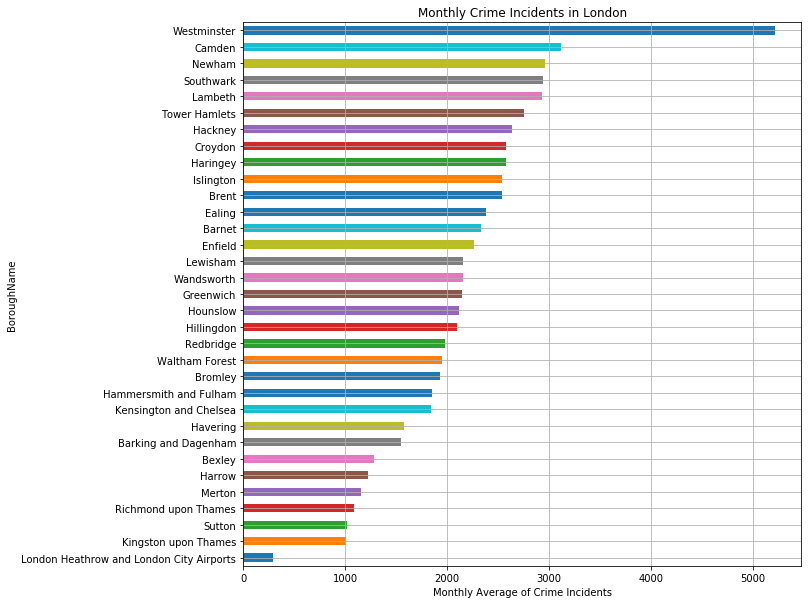

In [113]:
#Visualize crime data
crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

Westminster has the biggest number of reported crime, followed by Camden, Newham and Southwark.

In [114]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
crime.drop([22], inplace=True)

In [115]:
#Combine crime data and borough information data
df = pd.merge(crime,info, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1551.166667,194352,51.5607,0.1557
1,Barnet,2335.916667,369088,51.6252,-0.1517
2,Bexley,1282.083333,236687,51.4549,0.1505
3,Brent,2540.125000,317264,51.5588,-0.2817
4,Bromley,1929.958333,317899,51.4039,0.0198


In [116]:
#Check data type
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [117]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [118]:
df.shape

(32, 5)

In [119]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1551.166667,194352,51.5607,0.1557,7.981223
1,Barnet,2335.916667,369088,51.6252,-0.1517,6.328888
2,Bexley,1282.083333,236687,51.4549,0.1505,5.416788
3,Brent,2540.125000,317264,51.5588,-0.2817,8.006345
4,Bromley,1929.958333,317899,51.4039,0.0198,6.070980


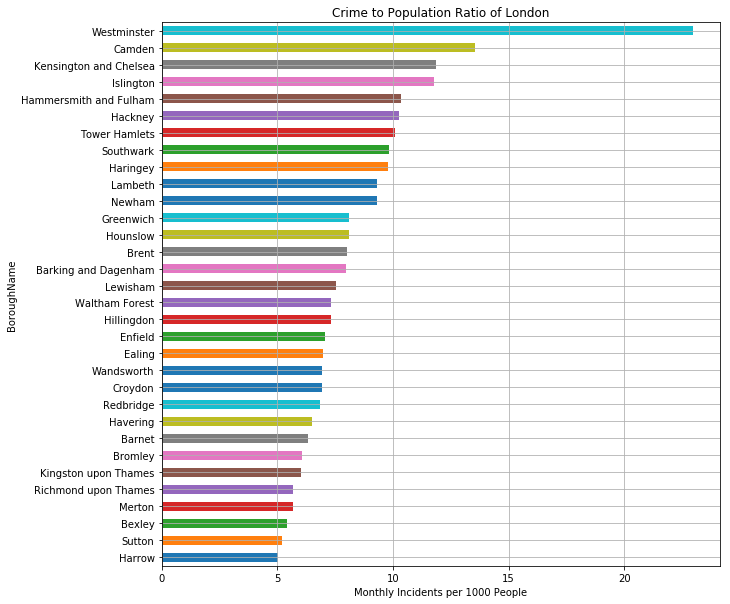

In [120]:
#Visualize crime per 1000 people
df.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [1]:
import folium
from geopy.geocoders import Nominatim

In [2]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 51.5073219, -0.1276474.


In [123]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

We can see that Westminster and Camden still remains top 2 dangerous area even after taking population into consideration.

**b. Cluster Analysis**   
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [124]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 179 uniques categories.


In [125]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [126]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
onehot.shape

(1112, 180)

In [128]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00
1,Barnet,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00
2,Bexley,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.038462,0.000000,0.038462,0.00,0.00,0.000000,0.00
3,Brent,0.000000,0.000000,0.000000,0.04,0.00,0.0000,0.00,0.020000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00
4,Bromley,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.025641,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.025641,0.00
5,Camden,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.000000,0.020000,...,0.040000,0.020000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00
6,Croydon,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.055556,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00
7,Ealing,0.000000,0.000000,0.000000,0.00,0.00,0.0200,0.00,0.020000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.040000,0.000000,0.02,0.00,0.000000,0.00
8,Enfield,0.000000,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.000000,0.000000,...,0.020833,0.041667,0.0000,0.020833,0.000000,0.000000,0.00,0.00,0.020833,0.00
9,Greenwich,0.028571,0.000000,0.000000,0.00,0.00,0.0000,0.00,0.028571,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.028571,0.028571,0.00,0.00,0.000000,0.00


In [129]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0           Golf Course  0.14
1     Martial Arts Dojo  0.14
2           Supermarket  0.14
3  Gym / Fitness Center  0.14
4           Bus Station  0.14


----Barnet----
                   venue  freq
0                   Café  0.67
1               Bus Stop  0.33
2     African Restaurant  0.00
3  Performing Arts Venue  0.00
4           Optical Shop  0.00


----Bexley----
                  venue  freq
0                   Pub  0.12
1  Fast Food Restaurant  0.08
2           Coffee Shop  0.08
3        Clothing Store  0.08
4    Italian Restaurant  0.08


----Brent----
                 venue  freq
0                Hotel  0.08
1          Coffee Shop  0.08
2  Sporting Goods Shop  0.06
3       Clothing Store  0.06
4  American Restaurant  0.04


----Bromley----
                  venue  freq
0           Coffee Shop  0.15
1        Clothing Store  0.13
2           Pizza Place  0.05
3  Gym / Fitness Center  0.05
4                   Bar  0.05


-

In [130]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Gym / Fitness Center,Park,Pool,Supermarket,Golf Course,Martial Arts Dojo,Bus Station,Electronics Store,English Restaurant,Dessert Shop
1,Barnet,Café,Bus Stop,Yoga Studio,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,French Restaurant,Food Court,Food
2,Bexley,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Clothing Store,Coffee Shop,Grocery Store,Furniture / Home Store,Pharmacy,Sandwich Place
3,Brent,Coffee Shop,Hotel,Clothing Store,Sporting Goods Shop,American Restaurant,Italian Restaurant,Sandwich Place,Bar,Grocery Store,Electronics Store
4,Bromley,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,English Restaurant,Cosmetics Shop,Irish Pub,Pub


In [131]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [132]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10] 

array([0, 3, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1551.166667,194352,51.5607,0.1557,7.981223,0,Gym / Fitness Center,Park,Pool,Supermarket,Golf Course,Martial Arts Dojo,Bus Station,Electronics Store,English Restaurant,Dessert Shop
1,Barnet,2335.916667,369088,51.6252,-0.1517,6.328888,3,Café,Bus Stop,Yoga Studio,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,French Restaurant,Food Court,Food
2,Bexley,1282.083333,236687,51.4549,0.1505,5.416788,2,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Clothing Store,Coffee Shop,Grocery Store,Furniture / Home Store,Pharmacy,Sandwich Place
3,Brent,2540.125000,317264,51.5588,-0.2817,8.006345,2,Coffee Shop,Hotel,Clothing Store,Sporting Goods Shop,American Restaurant,Italian Restaurant,Sandwich Place,Bar,Grocery Store,Electronics Store
4,Bromley,1929.958333,317899,51.4039,0.0198,6.070980,2,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,English Restaurant,Cosmetics Shop,Irish Pub,Pub


In [134]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's observe each clusters and name them according to their characteristics

In [135]:
# Cluster 0: Healthy area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,7.981223,0,Gym / Fitness Center,Park,Pool,Supermarket,Golf Course,Martial Arts Dojo,Bus Station,Electronics Store,English Restaurant,Dessert Shop


In [136]:
# Cluster 1: Lively area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Hackney,10.248829,1,Pub,Coffee Shop,Cocktail Bar,Café,Clothing Store,Brewery,Grocery Store,Restaurant,Hotel,Vegetarian / Vegan Restaurant
11,Hammersmith and Fulham,10.339890,1,Pub,Italian Restaurant,Indian Restaurant,Café,Gastropub,Clothing Store,Japanese Restaurant,Plaza,Gift Shop,German Restaurant
12,Haringey,9.791554,1,Fast Food Restaurant,Pub,Grocery Store,Bar,Mediterranean Restaurant,Restaurant,Café,Gym / Fitness Center,Park,Bakery
17,Islington,11.789394,1,Pub,Bakery,Cocktail Bar,Ice Cream Shop,Mediterranean Restaurant,Music Venue,Furniture / Home Store,Theater,Boutique,Gift Shop
18,Kensington and Chelsea,11.838503,1,Clothing Store,Gym / Fitness Center,Garden,Burger Joint,English Restaurant,Restaurant,Modern European Restaurant,Italian Restaurant,Bakery,Café
20,Lambeth,9.309174,1,Pub,Market,Caribbean Restaurant,Thai Restaurant,Restaurant,Pizza Place,BBQ Joint,Tapas Restaurant,Beer Bar,Yoga Studio
25,Richmond upon Thames,5.685470,1,Pub,Coffee Shop,Italian Restaurant,Indian Restaurant,Pharmacy,Bookstore,Grocery Store,Bus Stop,Fast Food Restaurant,Sandwich Place
26,Southwark,9.849178,1,Pub,Hotel,Coffee Shop,Indian Restaurant,Bar,Scenic Lookout,Restaurant,Pizza Place,Theater,English Restaurant
29,Waltham Forest,7.333134,1,Grocery Store,Pub,Deli / Bodega,Pizza Place,Beer Store,Tea Room,Gym / Fitness Center,Coffee Shop,Concert Hall,Trail


In [137]:
# Cluster 2: Busy area (Coffee shops, Clothing stores)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,5.416788,2,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Clothing Store,Coffee Shop,Grocery Store,Furniture / Home Store,Pharmacy,Sandwich Place
3,Brent,8.006345,2,Coffee Shop,Hotel,Clothing Store,Sporting Goods Shop,American Restaurant,Italian Restaurant,Sandwich Place,Bar,Grocery Store,Electronics Store
4,Bromley,6.070980,2,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,English Restaurant,Cosmetics Shop,Irish Pub,Pub
5,Camden,13.547893,2,Hotel,Café,Coffee Shop,Bookstore,Train Station,Breakfast Spot,Hotel Bar,Pizza Place,Pub,Sandwich Place
6,Croydon,6.921157,2,Pub,Coffee Shop,Gym / Fitness Center,Burger Joint,Asian Restaurant,Gaming Cafe,Breakfast Spot,Mediterranean Restaurant,Burrito Place,Café
7,Ealing,6.964234,2,Coffee Shop,Pub,Clothing Store,Bar,Bakery,Hotel,Pizza Place,Italian Restaurant,Vietnamese Restaurant,Park
8,Enfield,7.059014,2,Clothing Store,Sandwich Place,Supermarket,Coffee Shop,Department Store,Pharmacy,Mobile Phone Shop,Shopping Mall,Pub,Bookstore
9,Greenwich,8.112759,2,Pub,Fast Food Restaurant,Hotel,Clothing Store,Coffee Shop,Pizza Place,Supermarket,Sandwich Place,African Restaurant,Grocery Store
13,Harrow,5.050225,2,Thai Restaurant,Indie Movie Theater,Indian Restaurant,Convenience Store,Coffee Shop,Supermarket,Yoga Studio,Furniture / Home Store,French Restaurant,Food Court
14,Havering,6.506802,2,Clothing Store,Shopping Mall,Coffee Shop,Café,Hotel,Fast Food Restaurant,Bookstore,Bakery,Pub,Multiplex


In [138]:
# Cluster 3: Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.328888,3,Café,Bus Stop,Yoga Studio,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,French Restaurant,Food Court,Food


In [139]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.081911,4,Bed & Breakfast,Café,Hotel,Metro Station,Park,Chinese Restaurant,Fish & Chips Shop,Gaming Cafe,Furniture / Home Store,French Restaurant
23,Newham,9.295644,4,Hotel,Coffee Shop,Airport,Airport Lounge,Rafting,Pharmacy,Light Rail Station,Chinese Restaurant,Fast Food Restaurant,Gaming Cafe
28,Tower Hamlets,10.107552,4,Italian Restaurant,Hotel,Coffee Shop,Pizza Place,Café,Convenience Store,Outdoor Sculpture,Chinese Restaurant,Gym / Fitness Center,Sandwich Place


#### 4. Results & Recommendation

Now we will review all the analysis made in this project before we make a conclusion on which area to live as an international student or invest as a student accommodation builder.   

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.   

**a. Safety**   
Safety can be determined by the criminal rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.

In [140]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,BoroughName,CrimeToPop,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,22.964690,5209.333333,226841,51.4973,-0.1372,2,Hotel,Coffee Shop,Sandwich Place,Theater,Hotel Bar,Juice Bar,Sushi Restaurant,Portuguese Restaurant,Pub,Fast Food Restaurant
5,Camden,13.547893,3112.208333,229719,51.5290,-0.1255,2,Hotel,Café,Coffee Shop,Bookstore,Train Station,Breakfast Spot,Hotel Bar,Pizza Place,Pub,Sandwich Place
18,Kensington and Chelsea,11.838503,1842.000000,155594,51.5020,-0.1947,1,Clothing Store,Gym / Fitness Center,Garden,Burger Joint,English Restaurant,Restaurant,Modern European Restaurant,Italian Restaurant,Bakery,Café
17,Islington,11.789394,2542.583333,215667,51.5416,-0.1022,1,Pub,Bakery,Cocktail Bar,Ice Cream Shop,Mediterranean Restaurant,Music Venue,Furniture / Home Store,Theater,Boutique,Gift Shop
11,Hammersmith and Fulham,10.339890,1847.583333,178685,51.4927,-0.2339,1,Pub,Italian Restaurant,Indian Restaurant,Café,Gastropub,Clothing Store,Japanese Restaurant,Plaza,Gift Shop,German Restaurant
10,Hackney,10.248829,2637.833333,257379,51.5450,-0.0553,1,Pub,Coffee Shop,Cocktail Bar,Café,Clothing Store,Brewery,Grocery Store,Restaurant,Hotel,Vegetarian / Vegan Restaurant
28,Tower Hamlets,10.107552,2758.250000,272890,51.5099,-0.0059,4,Italian Restaurant,Hotel,Coffee Shop,Pizza Place,Café,Convenience Store,Outdoor Sculpture,Chinese Restaurant,Gym / Fitness Center,Sandwich Place
26,Southwark,9.849178,2939.625000,298464,51.5035,-0.0804,1,Pub,Hotel,Coffee Shop,Indian Restaurant,Bar,Scenic Lookout,Restaurant,Pizza Place,Theater,English Restaurant
12,Haringey,9.791554,2578.958333,263386,51.6000,-0.1119,1,Fast Food Restaurant,Pub,Grocery Store,Bar,Mediterranean Restaurant,Restaurant,Café,Gym / Fitness Center,Park,Bakery
20,Lambeth,9.309174,2925.333333,314242,51.4607,-0.1163,1,Pub,Market,Caribbean Restaurant,Thai Restaurant,Restaurant,Pizza Place,BBQ Joint,Tapas Restaurant,Beer Bar,Yoga Studio


**b. Atmosphere**   
And from the cluster analysis made above, we will give each clusters a name according to the characteristics inferrable from the popular venues.

According to my interpretation, **Cluster 0** is **'Healthy Area'** with gyms, parks, pools and golf courses as popular places.

In [141]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Barking and Dagenham'], dtype=object)

According to my interpretation, **Cluster 1** is **'Lively Area'** with many pubs and restaurants.

In [142]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Hackney', 'Hammersmith and Fulham', 'Haringey', 'Islington',
       'Kensington and Chelsea', 'Lambeth', 'Richmond upon Thames',
       'Southwark', 'Waltham Forest'], dtype=object)

According to my interpretation, **Cluster 2** is **'Busy Area'** with many coffee shops and clothing stores.

In [143]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing',
       'Enfield', 'Greenwich', 'Harrow', 'Havering', 'Hillingdon',
       'Kingston upon Thames', 'Lewisham', 'Merton', 'Redbridge',
       'Sutton', 'Wandsworth', 'Westminster'], dtype=object)

According to my interpretation, **Cluster 3** is **'Quiet Area'** with cafe, bus stop, and yoga studio as top venues.

In [144]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Barnet'], dtype=object)

According to my interpretation, **Cluster 4** is **'Traveller Area'** with bed & breakfast, hotels, and airport.

In [145]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Hounslow', 'Newham', 'Tower Hamlets'], dtype=object)

Now, what kind of atmosphere students may prefer differ by every student. So using my personal preferance as a student moving to London and some common sense, I will give scores to each clusters.   
I have decided to give preference in the order of Busy Area, Lively Area, Healthy Area, Quiet Area, and Traveller Area.

**c. Weighted score table**   
Finally, let's calculate the scores of each borough.

In [146]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

,BoroughName,CrimeToPop,Cluster Labels
0,Barking and Dagenham,7.981223,0
1,Barnet,6.328888,3
2,Bexley,5.416788,2
3,Brent,8.006345,2
4,Bromley,6.070980,2


In [147]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barking and Dagenham,7.981223,0,0.836389
1,Barnet,6.328888,3,0.928624
2,Bexley,5.416788,2,0.979538
3,Brent,8.006345,2,0.834987
4,Bromley,6.070980,2,0.943021


In [148]:
score['Atmosphere'] = 0
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,7.981223,0,0.836389,0
1,Barnet,6.328888,3,0.928624,0
2,Bexley,5.416788,2,0.979538,0
3,Brent,8.006345,2,0.834987,0
4,Bromley,6.070980,2,0.943021,0


In [149]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,7.981223,0.8,0.836389,0.0
1,Barnet,6.328888,3.0,0.928624,0.7
2,Bexley,5.416788,2.0,0.979538,1.0
3,Brent,8.006345,2.0,0.834987,1.0
4,Bromley,6.070980,2.0,0.943021,1.0


In [150]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Atmosphere,Score
13,Harrow,1.000000,1.0,2.000000
27,Sutton,0.990619,1.0,1.990619
2,Bexley,0.979538,1.0,1.979538
22,Merton,0.965216,1.0,1.965216
19,Kingston upon Thames,0.944754,1.0,1.944754
4,Bromley,0.943021,1.0,1.943021
14,Havering,0.918693,1.0,1.918693
24,Redbridge,0.899268,1.0,1.899268
6,Croydon,0.895563,1.0,1.895563
30,Wandsworth,0.894957,1.0,1.894957


#### 5. Conclusion

From our analysis, we have found that the five boroughs below are the best places to build a student hall, based on safety and atmosphere of the neighborhood.
The top five boroughs all belong to the Busy Area cluster, with many coffee shops and clothing stores. Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.

In [152]:
df_top5 = df.iloc[[13,27,2,22,19],:]
df_top5

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
13,Harrow,1229.083333,243372,51.5898,-0.3346,5.050225
27,Sutton,1022.333333,195914,51.3618,-0.1945,5.218276
2,Bexley,1282.083333,236687,51.4549,0.1505,5.416788
22,Merton,1152.958333,203223,51.4014,-0.1958,5.673365
19,Kingston upon Thames,1007.416667,166793,51.4085,-0.3064,6.039922


In [154]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

**Limitations**   
However, it obviously seems strange that the best places to live in Loondon are all far out suburbs.
This is due to limitations this research holds. Among numerous factors that determine a good neighborhood, we only took into consideration what type of venues are popular and how many crime incidents are recorded for the sake of simplification. This means that serious crimes like homicide was treated the same as a comparatively petty crime like shoplifting. Moreover, the number of stores in the neighborhood may be as important as what type of stores there are.

To overcome the limitations of this study, we will need further data such as distance to city center and housing prices. Also, taking crime categories into factor and weighting them differently may be helpful. Nevertheless, this research was still meaningful in that we were able to explore the neighborhoods in depth.